318.0 0.1
Debug: Skipped line 1: G: 0.50480
Debug: Skipped line 2: gamma: 0.10054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

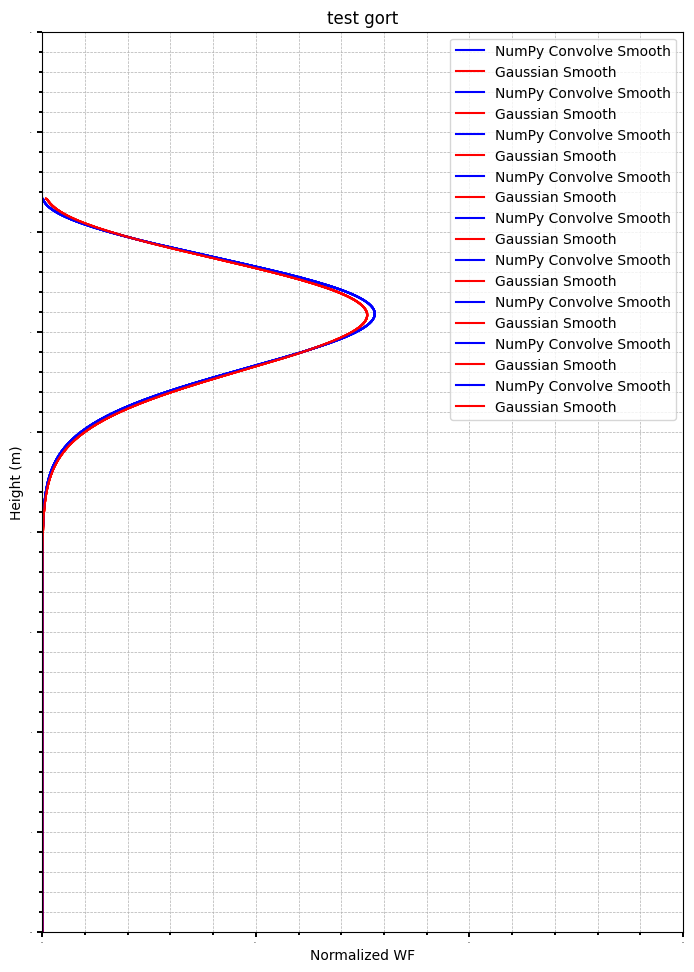

In [4]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def run_gort():
    # Setting plotting
    plt.figure(figsize=(8.27, 11.69))  # A4 size in inches

    nsite = 9
    indir = 'C:\\Users\\allen\\OneDrive\\Desktop\\Work\\Scripts\\Lidar Simulation\\gort_python\\*.in'
    fplot = sorted(glob.glob(indir))

    for i in range(1, nsite + 1):
        # Assuming gort.out file is already present in the current directory
        gort_out_file = 'gort.out'

        # Reading gort output file
        gout_dtype = np.dtype([
            ('height', np.float32),
            ('fp', np.float32),
            ('efp', np.float32),
            ('pgap', np.float32),
            ('dpdz', np.float32),
            ('wvfm', np.float32)
        ])

        with open(gort_out_file, 'r') as f:
            gn_level, dz = map(float, f.readline().split())
            print(gn_level, dz)
            n_ext = int(10.0 / dz)
            n_tot = int(gn_level + n_ext)

            ght = np.zeros(n_tot, dtype=np.float32)
            wvfm = np.zeros(n_tot, dtype=np.float32)
            gwvfm = np.zeros(n_tot, dtype=np.float32)
            ght[:n_ext] = np.arange(n_ext) * dz - 10  # extend height to below ground 10m deep
            wvfm[:n_ext] = 0  # extend wvfm to below ground 10m deep

            for skip_count in range(2):
                line_skip = f.readline()  # skip lines
                print(f"Debug: Skipped line {skip_count + 1}: {line_skip.strip()}")

            for ilevel in range(int(gn_level)):
                line = f.readline().strip()
                parts = line.split()
                parts = [float(part) for part in parts]
                gout = np.array(tuple(parts), dtype=gout_dtype)
                ght[ilevel + n_ext] = gout['height']
                wvfm[ilevel + n_ext] = gout['wvfm']

        width = int(0.6 / dz) + 1
        gwvfm_np_convolve  = np.convolve(wvfm, np.ones(width) / width, mode='same')
        gwvfm_gaussian = gaussian_filter(wvfm, sigma = width, mode = 'nearest')

        jx1 = 0
        jx2 = 0.3
        jh1 = -5
        jh2 = 40
        cs = 1.4
        ct = 1.4
        title = "test gort"

        print(gwvfm)
        print(ght)

        plt.plot(gwvfm_np_convolve, ght, label='NumPy Convolve Smooth', color='blue')
        plt.plot(gwvfm_gaussian, ght, label='Gaussian Smooth', color='red')
        plt.title(title)
        plt.xlabel('Normalized WF')
        plt.ylabel('Height (m)')
        plt.legend()

        # Setting limits
        plt.xlim(jx1, jx2)
        plt.ylim(jh1, jh2)
        
        # Adding grid lines and minor ticks
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

        # Setting major and minor ticks for x-axis and y-axis
        plt.xticks(np.arange(jx1, jx2 + 0.1, 0.1))  # Adjust based on your specific needs
        plt.yticks(np.arange(jh1, jh2 + 5, 5))    # Adjust based on your specific needs

        # Ensure tick labels are visible and appropriately sized
        plt.gca().tick_params(axis='both', which='major', labelsize=cs, width=ct)
        plt.gca().tick_params(axis='both', which='minor', width=ct)

    # Save the plot to a file
    plt.savefig('rw_f.pdf')
    # Display the plot in the notebook
    plt.show()

run_gort()


In [ ]:
import numpy as np
import subprocess
import glob
import matplotlib.pyplot as plt

def run_gort():
    # Setting plotting
    plt.figure(figsize=(8.27, 11.69))  # A4 size in inches

    nsite = 9
    indir = 'C:\\Users\\allen\\OneDrive\\Desktop\\Work\\Scripts\\Lidar Simulation\\gort_python\\branch\\*.in'
    fplot = sorted(glob.glob(indir))

    for i in range(1, nsite + 1):
        cmd = f'copy {fplot[i - 1]} gort.in'
        print(cmd)
        result = subprocess.run(cmd, shell=True, capture_output=True)
        if result.returncode != 0:
            print(result.stderr.decode())
            return

        # Run GORT model
        cmd = '../model/gort_lidar > temp.txt'
        result = subprocess.run(cmd, shell=True, capture_output=True)
        print('output created')

        # Reading gort output file
        gout_dtype = np.dtype([
            ('height', np.float32),
            ('fp', np.float32),
            ('efp', np.float32),
            ('pgap', np.float32),
            ('dpdz', np.float32),
            ('wvfm', np.float32)
        ])

        with open('gort.out', 'r') as f:
            gn_level, dz = map(float, f.readline().split())
            print(gn_level, dz)
            n_ext = int(10.0 / dz)
            n_tot = int(gn_level + n_ext)

            ght = np.zeros(gn_level, dtype=np.float32)
            pgap = np.zeros(gn_level, dtype=np.float32)

            for _ in range(2):
                _ = f.readline()  # skip lines

            for ilevel in range(int(gn_level)):
                line = f.readline()
                gout = np.fromstring(line, dtype=gout_dtype, sep=' ')
                ght[ilevel] = gout['height']
                pgap[ilevel] = gout['pgap']

        jx1 = 0
        jx2 = 1
        jh1 = 0
        jh2 = ght[-1]

        title = fplot[i - 1].split('\\')[-1][63:80]
        plt.plot(pgap, ght)
        plt.title(title)
        plt.xlabel('Pgap')
        plt.ylabel('Height (m)')
        plt.xlim(jx1, jx2)
        plt.ylim(jh1, jh2)
        cs = 1.4
        ct = 1.4
        plt.gca().tick_params(labelsize=cs, width=ct)

    plt.savefig('rw_fb_pgap.pdf')
    plt.close()

run_gort()
